## Downloading Cifar-100 dataset

In [115]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2021-09-11 11:28:41--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz.2’

cifar-100-python.ta 100%[===================>] 161.17M  32.4MB/s    in 5.6s    

2021-09-11 11:28:47 (28.9 MB/s) - ‘cifar-100-python.tar.gz.2’ saved [169001437/169001437]



In [116]:
!tar -xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


## Data Preprocessing

In [117]:
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [118]:
def unpickle(file):
  with open(file,'rb') as fo:
    myDict = pickle.load(fo,encoding='latin1')
  return myDict

In [119]:
trainData = unpickle('cifar-100-python/train')
for item in trainData:
  print(item,type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [120]:
print(len(trainData['data']))
print(len(trainData['data'][0]))

50000
3072


In [121]:
print(np.unique(trainData['fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [122]:
print(np.unique(trainData['coarse_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [123]:
print(trainData['batch_label'])

training batch 1 of 1


In [124]:
testData = unpickle('cifar-100-python/test')
metaData = unpickle('cifar-100-python/meta')


In [125]:
print("Fine labels: ",metaData['fine_label_names'],"\n")
print("coarse labels: ",metaData['coarse_label_names'])

Fine labels:  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 

In [126]:
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])
subCategory = pd.DataFrame(metaData['fine_label_names'],columns=['SubClass'])
print(category)
print(subCategory)

                        SuperClass
0                  aquatic_mammals
1                             fish
2                          flowers
3                  food_containers
4             fruit_and_vegetables
5     household_electrical_devices
6              household_furniture
7                          insects
8                 large_carnivores
9    large_man-made_outdoor_things
10    large_natural_outdoor_scenes
11  large_omnivores_and_herbivores
12                  medium_mammals
13        non-insect_invertebrates
14                          people
15                        reptiles
16                   small_mammals
17                           trees
18                      vehicles_1
19                      vehicles_2
         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [127]:
X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [129]:
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

Image Number : 41005
Shape of image : (32, 32, 3)
Image category : insects
Image subcategory : caterpillar


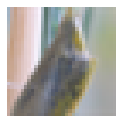

In [130]:
def image_show():
  rcParams['figure.figsize'] = 2,2
  imageId = np.random.randint(0,len(X_train))
  plt.imshow(X_train[imageId])
  plt.axis('off')
  print("Image Number :",imageId)
  print("Shape of image :",X_train[imageId].shape)
  print("Image category :",category.iloc[trainData['coarse_labels'][imageId]][0])
  print("Image subcategory :",subCategory.iloc[trainData['fine_labels'][imageId]][0])
image_show()

In [132]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)

y_train = trainData['fine_labels']
y_test = testData['fine_labels']

In [133]:
n_classes = 100
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)

In [134]:
from tensorflow.keras.applications import ResNet50
res_model = ResNet50(input_shape=(32,32,3),include_top=False,weights="imagenet")

In [135]:
for layer in res_model.layers[:143]:
  layer.trainable = False

In [136]:
model = models.Sequential()
model.add(res_model)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100,activation='softmax'))

In [146]:
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               524544    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0, patience=5)

history = model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[earlystop_callback])

Epoch 1/1000
1563/1563 [==============================] - 88s 56ms/step - loss: 2.3391 - accuracy: 0.3479 - val_loss: 2.7375 - val_accuracy: 0.3305
Epoch 2/1000
1563/1563 [==============================] - 87s 56ms/step - loss: 2.3198 - accuracy: 0.3529 - val_loss: 2.7592 - val_accuracy: 0.3249
Epoch 3/1000
1563/1563 [==============================] - 87s 55ms/step - loss: 2.3172 - accuracy: 0.3548 - val_loss: 2.7822 - val_accuracy: 0.3260
Epoch 4/1000
1563/1563 [==============================] - 86s 55ms/step - loss: 2.2928 - accuracy: 0.3590 - val_loss: 2.9163 - val_accuracy: 0.3280
Epoch 5/1000
1563/1563 [==============================] - 87s 56ms/step - loss: 2.2435 - accuracy: 0.3699 - val_loss: 2.9658 - val_accuracy: 0.3333
Epoch 6/1000
1563/1563 [==============================] - 88s 56ms/step - loss: 2.2423 - accuracy: 0.3664 - val_loss: 2.7858 - val_accuracy: 0.3347
Epoch 7/1000
1563/1563 [==============================] - 87s 56ms/step - loss: 2.2289 - accuracy: 0.3736 - val_

In [150]:
model.save('saved_model/model')

INFO:tensorflow:Assets written to: saved_model/model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [151]:
!zip model.zip saved_model/

  adding: saved_model/ (stored 0%)


In [152]:
ls

cifar-100-python/        cifar-100-python.tar.gz.1  lrfinder/  sample_data/
cifar-100-python.tar.gz  cifar-100-python.tar.gz.2  model.zip  saved_model/


Epoch 1/5


ValueError: ignored

391.0